In [8]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv('data/bfro_locations.csv')

In [10]:
df

,index,number,title,classification,timestamp,latitude,longitude
0,0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.50000,-142.90000
1,1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.18720,-132.79820
2,2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.20350,-132.82020
3,3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.93750,-141.56670
4,4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.05950,-149.78530
...,...,...,...,...,...,...,...
4245,4245,4159,Report 4159: Campers hear unusual grunting sou...,Class C,1995-11-15T12:00:00Z,31.22333,-94.96611
4246,4246,175,Report 175: Campers encounter large animal nea...,Class C,2000-07-30T12:00:00Z,47.47745,-121.04150
4247,4247,945,Report 945: Creature with red glowing eyes seen,Class C,1999-03-19T12:00:00Z,47.57778,-124.29330
4248,4248,1387,Report 1387: Father and son hear heavy footste...,Class C,1983-08-17T12:00:00Z,47.51030,-122.04560


In [11]:
# preprocess
df['Year'] = pd.to_datetime(df['timestamp']).dt.year
df['Month'] = pd.to_datetime(df['timestamp']).dt.month
df['Day'] = pd.to_datetime(df['timestamp']).dt.day
df['Time'] = pd.to_datetime(df['timestamp']).dt.time

this_year = date.today().year
# this_month = date.today().month
# this_day = date.today().day
df = df[df['Year'] < this_year]

/tmp/ipykernel_8356/1075644662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ax.index, y = ax.values, palette = 'Blues_d')


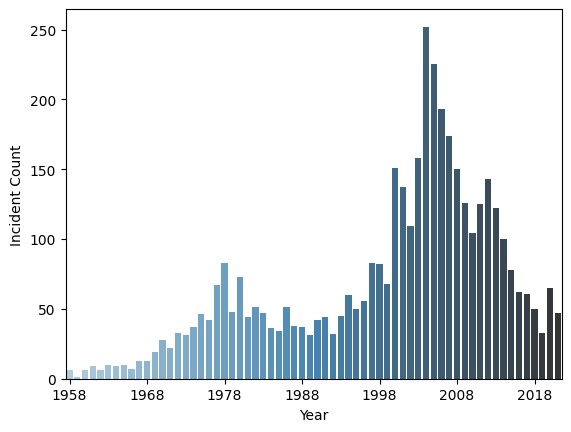

In [12]:
df = df[df['Year'] > 1957]
ax = df['Year'].value_counts().sort_index()
sns.barplot(x = ax.index, y = ax.values, palette = 'Blues_d')

plt.xlabel('Year')
plt.ylabel('Incident Count')

plt.xticks(ticks=np.arange(0, len(ax.index), 10), labels=ax.index[::10])

plt.show()

Month
10    555
7     523
8     499
9     431
11    410
6     405
5     293
1     266
4     244
12    228
3     184
2     177
Name: count, dtype: int64


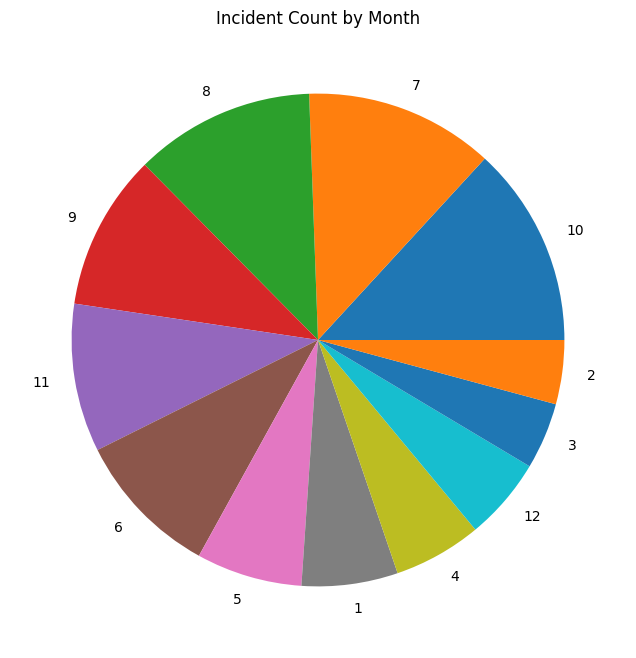

In [14]:
month_counts = df['Month'].value_counts()
print(month_counts)
plt.figure(figsize=(10,8))
plt.pie(month_counts, labels = month_counts.index)
plt.title('Incident Count by Month')
plt.show()
